# Artificital Neural Network

## Importing the libary

In [2]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Load MNIST dataset

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Normalize the pixel values

In [4]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

## Building the ANN

In [5]:
model = tf.keras.models.Sequential()

## Adding layers

In [6]:
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))

## Adding Output Layer

In [7]:
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

## Compiling the ANN

In [8]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

## Training the CNN on the Training set 

In [13]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0545 - accuracy: 0.9825
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0405 - accuracy: 0.9875
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0333 - accuracy: 0.9889
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0251 - accuracy: 0.9917
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0203 - accuracy: 0.9930
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0189 - accuracy: 0.9931
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0140 - accuracy: 0.9951
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0152 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0119 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.011

## Evaluate the model on the test data

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss : {loss : .2f}\nAccuracy : {accuracy : .2f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0831 - accuracy: 0.9737
Loss :  0.08
Accuracy :  0.97


## My written digit prediction

1/1 [==============================] - 0s 17ms/step


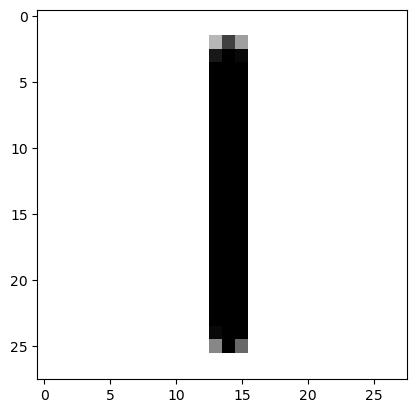

This digit is probably a 1


1/1 [==============================] - 0s 34ms/step


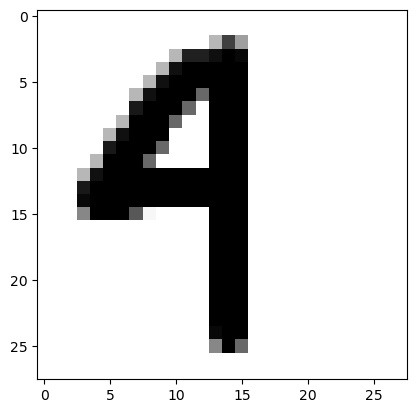

This digit is probably a 3


1/1 [==============================] - 0s 37ms/step


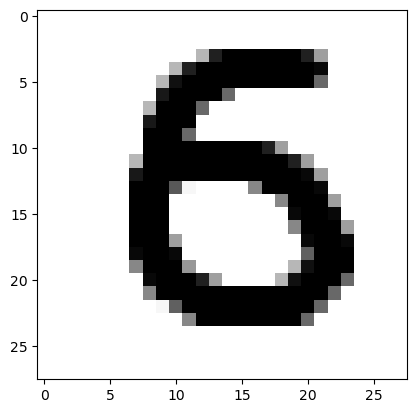

In [ ]:
image_number = 12

while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        pred = model.predict(img)
        plt.imshow(img[0], cmap = plt.cm.binary)
        plt.show()
        print(f"This digit is probably a {np.argmax(pred)}\n\n")
        plt.pause(1)  # Adjust the time delay as needed
    except Exception as e:
        print(f"Error processing image {image_number}: {e}")
    finally:
        image_number += 1